In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
from python.functions import *
from python.models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-01-26 16:36:02.962110: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-26 16:36:02.984547: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-01-26 16:36:02.984699: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-01-26 16:36:02.985940: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-26 16:36:02.987483: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-01-26 16:36:02.987678: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

In [3]:
stream = "gd1"

In [4]:
df, file = load_file(stream = stream, percent_bkg = 100)

### Prepare datasets for training

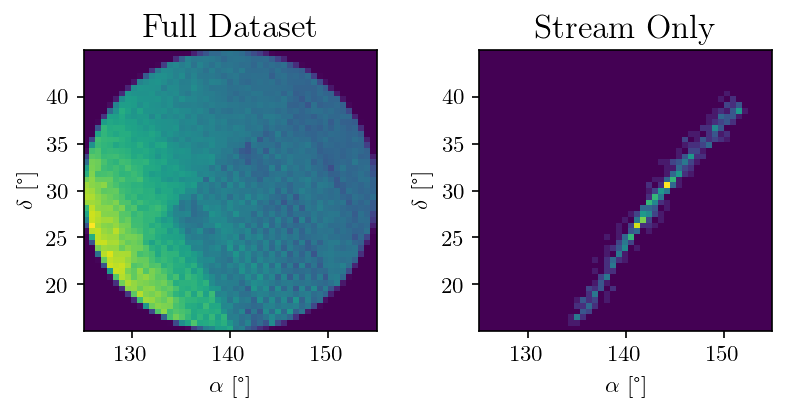

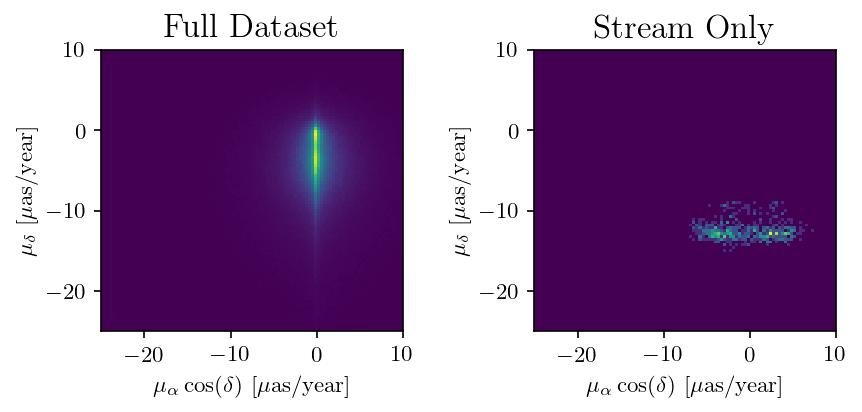

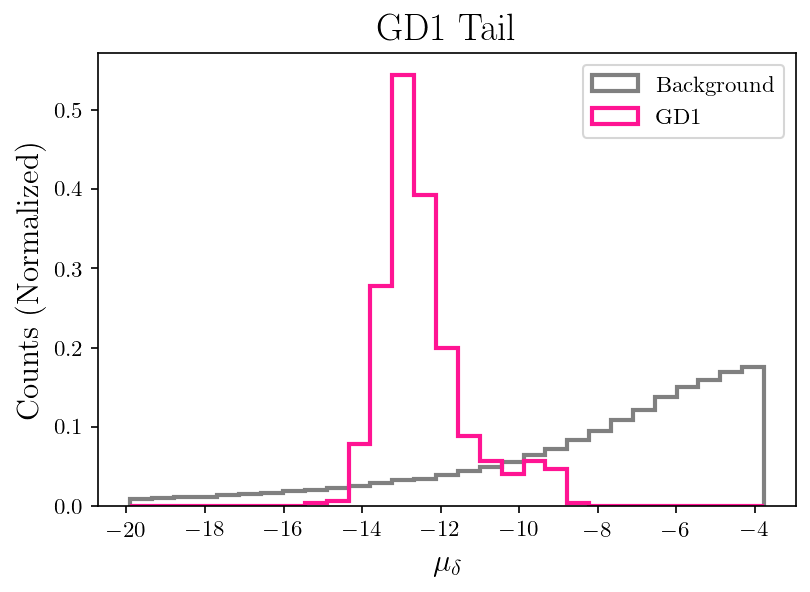

In [5]:
visualize_stream(df)

Sideband region: [-18.0,-9.5]
Signal region: [-15.0,-11.0]
Total counts: SR = 70,835, SB = 71,692


/clusterfs/ml4hep/mpettee/GaiaCWoLa/notebooks/../python/functions.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)
No handles with labels found to put in legend.


Signal region has 470 stream and 70,365 bkg events (0.67%).
Sideband region has 40 stream and 71,652 bkg events (0.06%).
f_sig = 12.0X f_sideband.


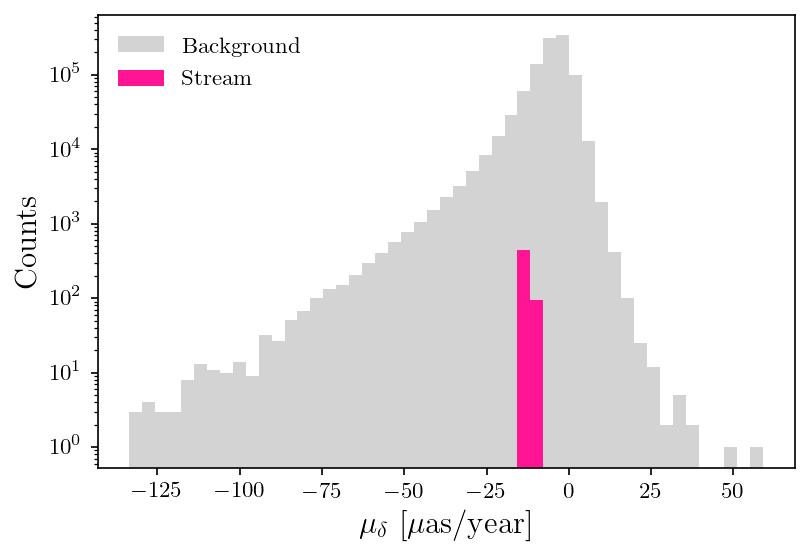

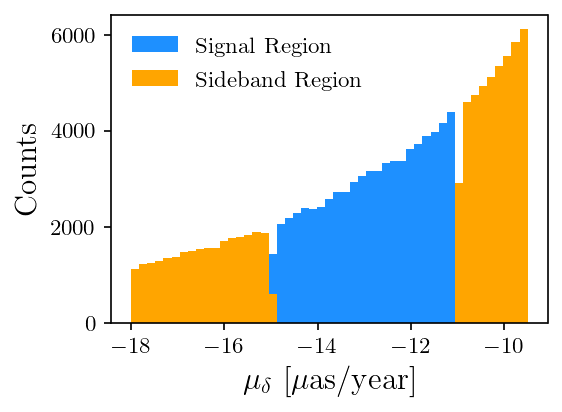

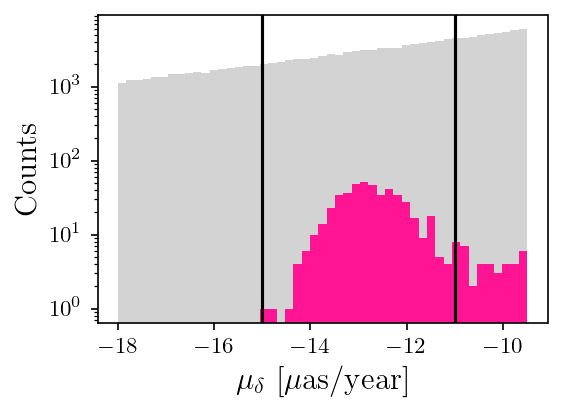

In [6]:
df = signal_sideband(df, stream = stream)

# Train

In [7]:
tf.keras.backend.clear_session()

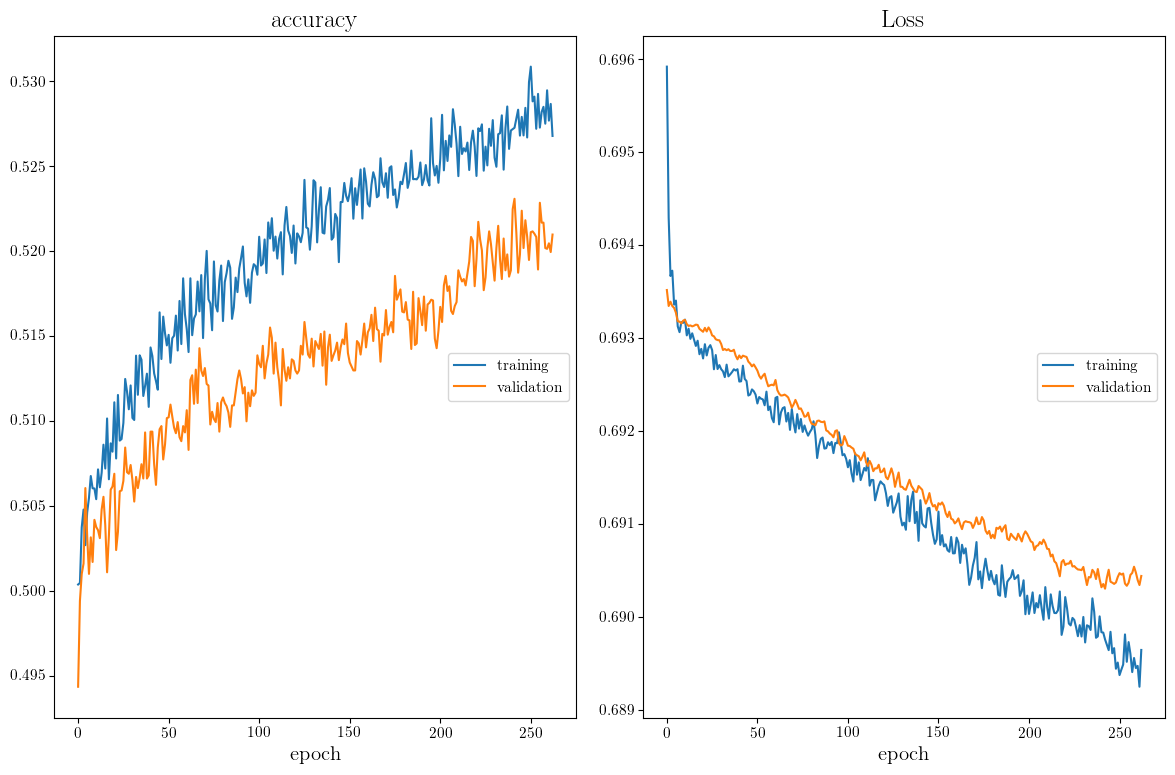

accuracy
	training         	 (min:    0.500, max:    0.531, cur:    0.527)
	validation       	 (min:    0.494, max:    0.523, cur:    0.521)
Loss
	training         	 (min:    0.689, max:    0.696, cur:    0.690)
	validation       	 (min:    0.690, max:    0.694, cur:    0.690)
10/10 [==============================] - 0s 27ms/step - loss: 0.6896 - accuracy: 0.5268 - val_loss: 0.6904 - val_accuracy: 0.5210
Best losses: [0.6892454624176025]
Loading weights from best loop, i.e. loop #0.
AUC: 0.537
Maximum purity of 66.7% at 0.01%
Top 10 stars: Purity = 90.0% 
Top 20 stars: Purity = 85.0% 
Top 50 stars: Purity = 74.0% 
Top 100 stars: Purity = 58.0% 


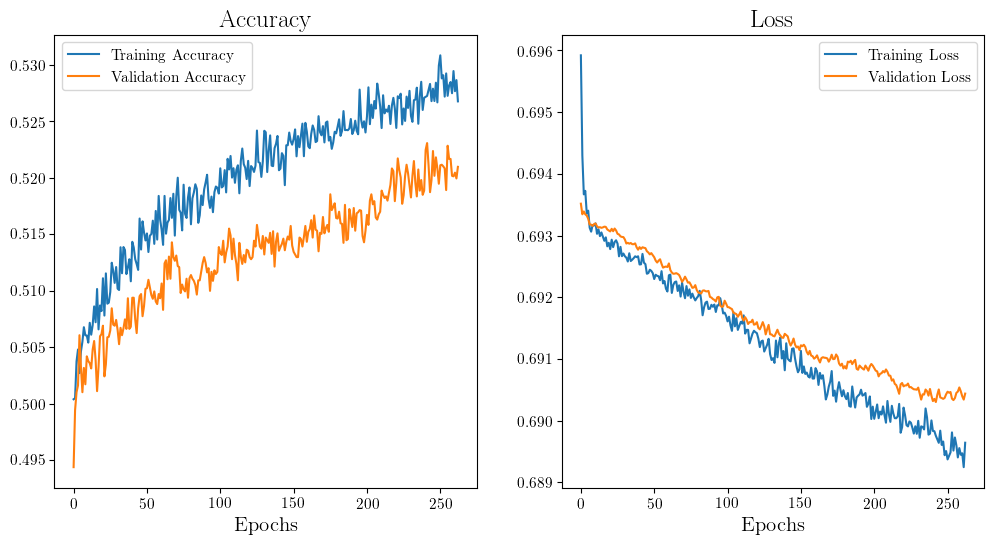

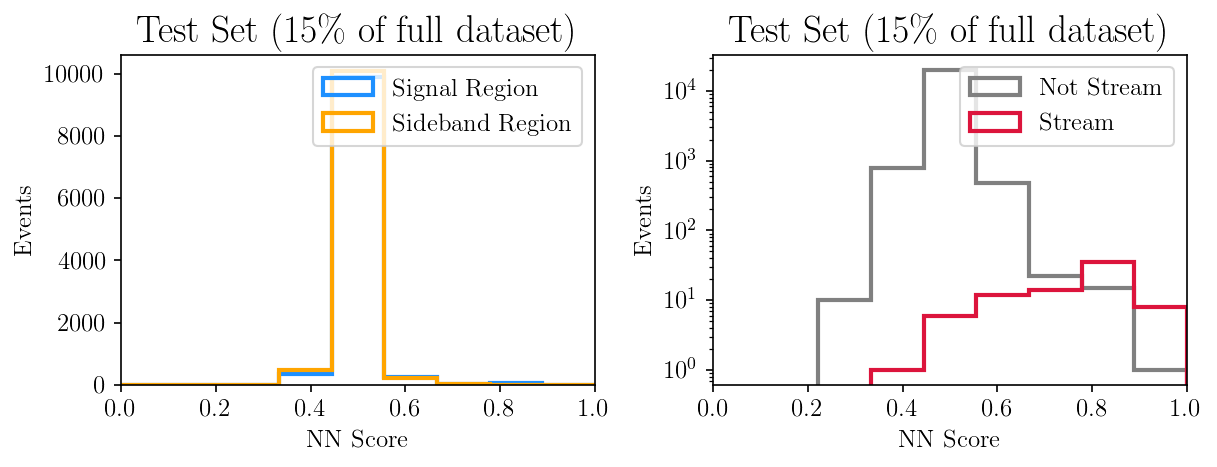

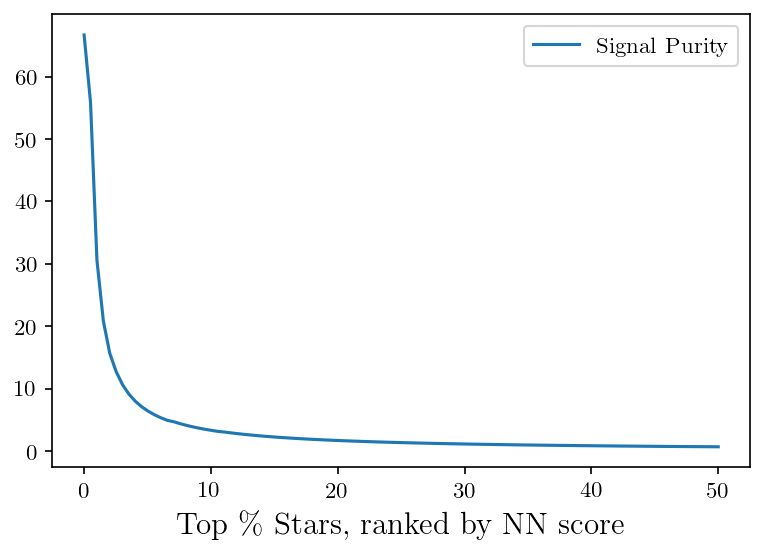

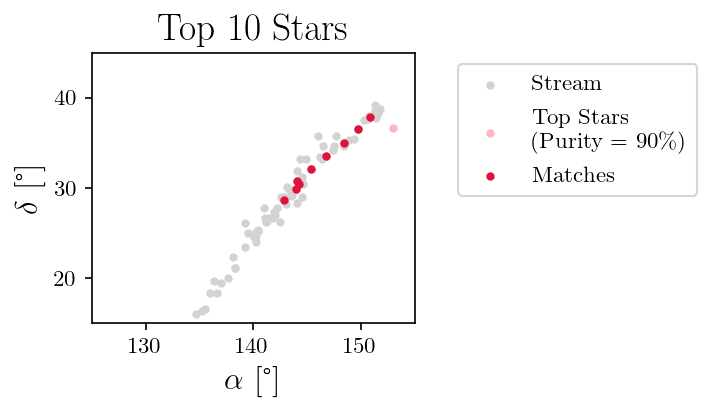

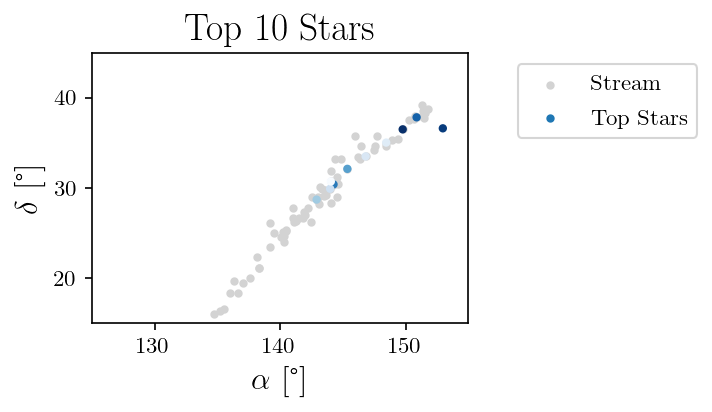

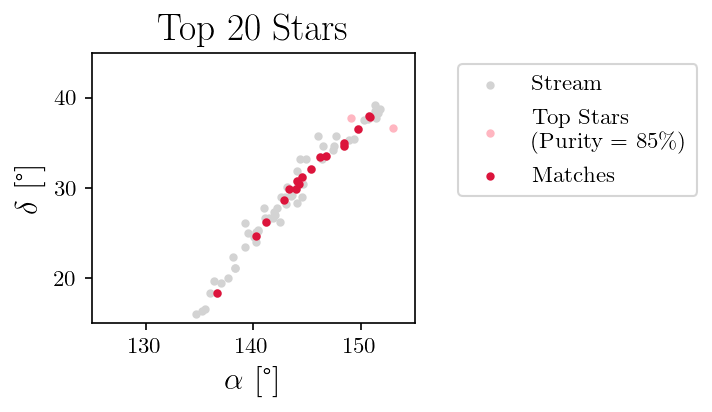

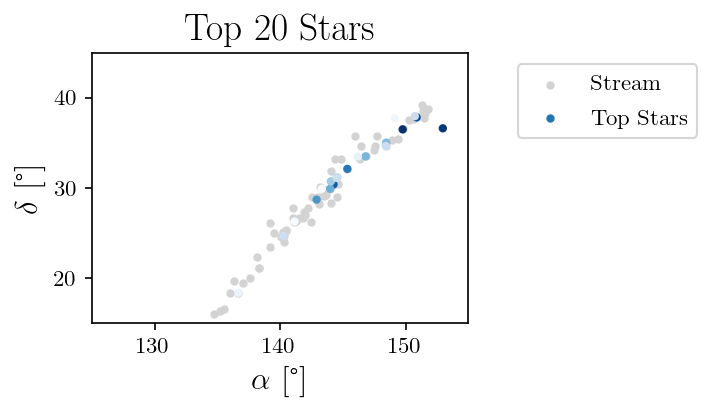

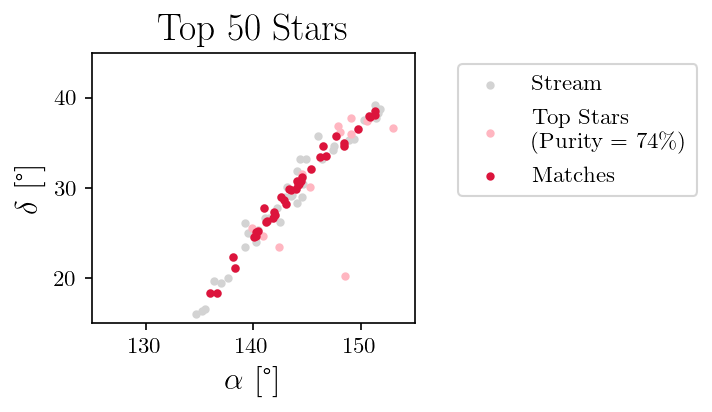

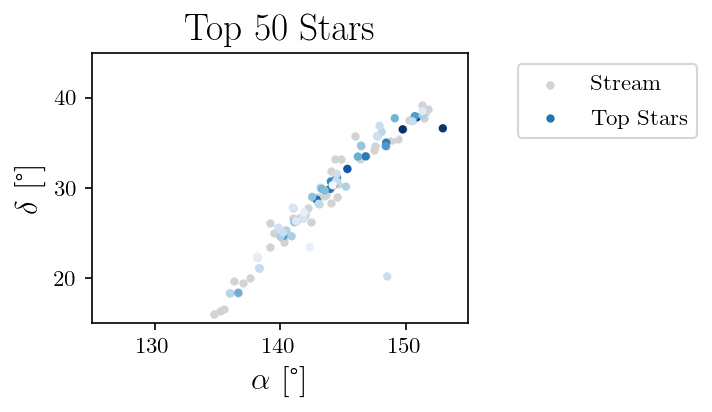

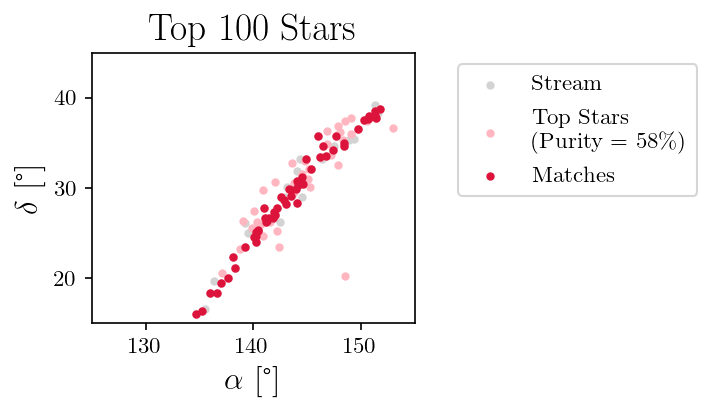

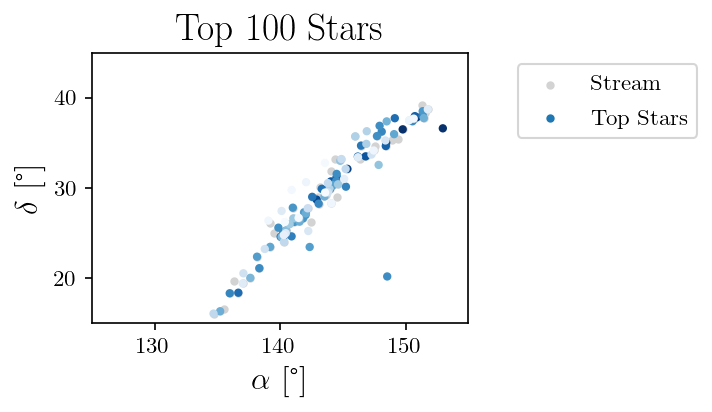

In [8]:
test = train(df, 
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 64, 
      batch_size = 10000, 
      dropout = 0.2, 
      epochs = 2000, 
      patience = 20)